In [4]:
from torchvision import datasets
import torch
data_folder ='~/data/FMINIST'
fmist = datasets.FashionMNIST(data_folder, download=True,train=True)

In [5]:
tr_images = fmist.data
tr_targets = fmist.targets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

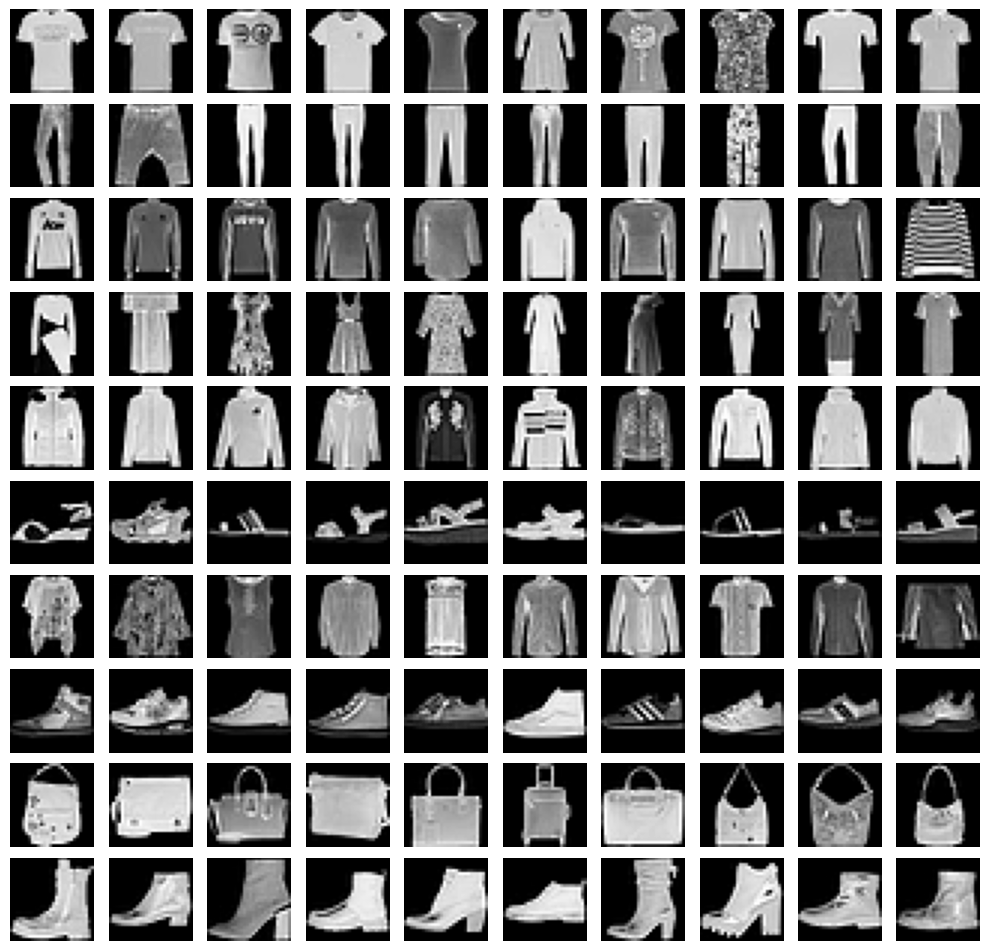

In [10]:
R,C = len(tr_targets.unique()),10
fig, ax = plt.subplots(R, C, figsize=(10,10))
for label_class, plot_row in enumerate(ax):
  label_x_rows = np.where(tr_targets == label_class)[0]
  for plot_cell in plot_row:
    plot_cell.grid(False);plot_cell.axis('off')
    ix= np.random.choice(label_x_rows)
    x, y = tr_images[ix], tr_targets[ix]
    plot_cell.imshow(x, cmap='gray')
    plt.tight_layout()

In [11]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torchvision import datasets

In [13]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
      x = x.float()
      x = x.view(-1,28*28)
      self.x, self.y = x,y
    def __getitem__(self,idx):
        x,y = self.x[idx], self.y[idx]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)


In [20]:
def get_data():
  train = FMNISTDataset(tr_images, tr_targets)
  trn_dl = DataLoader(train, batch_size=32, shuffle=True)
  return trn_dl

#Treinando o modelo

In [21]:
from torch.optim import SGD
def get_model():
  model = nn.Sequential(
      nn.Linear(28*28,1000),
      nn.ReLU(),
      nn.Linear(1000,10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(),lr=1e-2)
  return model, loss_fn, optimizer

In [32]:
@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  max_values, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()

In [33]:
def train_batch(x, y, model, opt, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction,y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

In [34]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [36]:
losses, accuracies = [], []
for epoch in range(5):
  print(epoch)
  epoch_losses, epoch_accuracies = [],[]
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    epoch_losses.append(batch_loss)
  epoch_loss = np.array(epoch_losses).mean()
  for ix, batch in enumerate(iter(trn_dl)):
    x,y = batch
    is_correct = accuracy(x,y, model)
    epoch_accuracies.extend(is_correct)
  epoch_accuracy = np.mean(epoch_accuracies)
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

0
1
2
3
4


TypeError: unsupported format string passed to generator.__format__

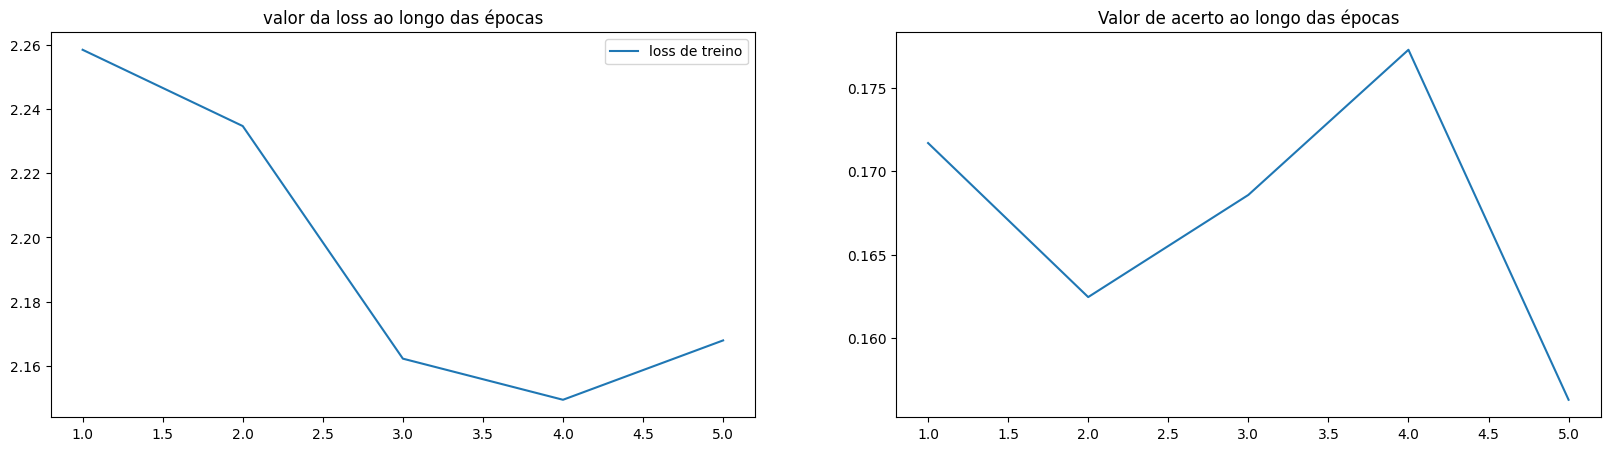

In [39]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('valor da loss ao longo das épocas')
plt.plot(epochs, losses, label='loss de treino')
plt.legend()
plt.subplot(122)
plt.title('Valor de acerto ao longo das épocas')
plt.plot(epochs, accuracies, label='Acerto de Treino')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100 for x in plt.gca().get_yticks())])
plt.legend()
